# Overview
The concept of ray tracing: a technique for generating an image by tracing the path of light through pixels in an image plane and simulating the effects of its encounters with virtual objects.

The technique is capable of producing a very high degree of visual realism, usually higher than that of typical scanline rendering methods, but at a greater computational cost.

The objective of this notebook is to implement a ray casting/tracing engine. A ray tracer shoots rays from the observer’s eye through a screen and into a scene of objects. It calculates the ray’s
intersection with the objects, finds the nearest intersection and calculates the color of the surface according to its material and lighting conditions.

In [1]:
# This small code snippet will allow us to change the python files without resetting the kernel
%load_ext autoreload
%autoreload 2

## Scene 1: Hello Ray Tracing!

In this scene we render three planes with different colors. We can test this scene to check if the camera and colors are working correctly.

![](scenes/scene1.png)

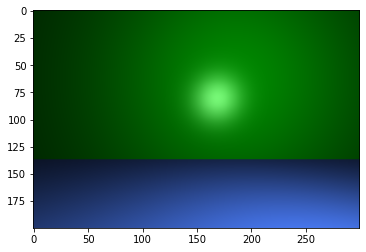

In [2]:
from ray_tracing import *

plane_a = Plane([0,1,0],[0,-1,0])
plane_a.set_material([0.3, 0.5, 1], [0.3, 0.5, 1], [1, 1, 1], 100, 0.5)
plane_b = Plane([0,0,1], [0,0,-3])
plane_b.set_material([0, 0.5, 0], [0, 1, 0], [1, 1, 1], 100, 0.5)

objects = [plane_a, plane_b]
light = PointLight(intensity= np.array([1, 1, 1]),position=np.array([1,1,1]),kc=0.1,kl=0.1,kq=0.1)
lights = [light]
ambient = np.array([0.1,0.1,0.1])
camera = np.array([0,0,1])

im = render_scene(camera, ambient, lights, objects, (300, 200), 1)
plt.imshow(im)
plt.imsave('scene1.png', im)

## Scene 2 - Triangles and Shadows

This scene adds a single triangle on the background of a plane. Because of it's position, it will also cast shadow on the plane.
The lighting is Directional

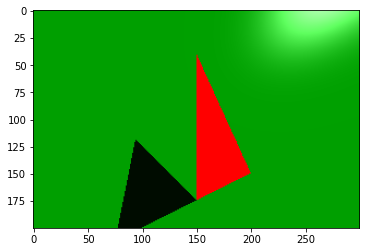

In [3]:
triangle = Triangle([1,-1,-2],[0,1,-1.5],[0,-1,-1])
triangle.set_material([1, 0, 0], [1, 0, 0], [0, 0, 0], 100, 0.5)
plane = Plane([0,0,1], [0,0,-3])
plane.set_material([0, 0.5, 0], [0, 1, 0], [1, 1, 1], 100, 0.5)

objects = [triangle,plane]
light = DirectionalLight(intensity= np.array([1, 1, 1]),direction=np.array([1,1,1]))
lights = [light]
ambient = np.array([0.1,0.1,0.1])
camera = np.array([0,0,1])

im = render_scene(camera, ambient, lights, objects, (300, 200), 1)
plt.imshow(im)
plt.imsave('scene2.png', im)

## Scene 3 - Mesh with Reflections

This scene has a pyramid with light reflections on plane.


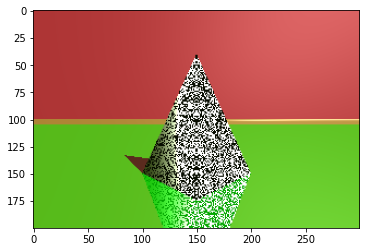

In [4]:
v_list = np.array([[-1,-1,-2],[1,-1,-2],[0,-1,-1],[0,1,-1.5]])
f_list = np.array([[0,2,1],[0,1,3],[0,2,3],[1,3,2]])

mesh = Mesh(v_list, f_list)
mesh.set_material([0.3, 0.5, 0], [0.3, 0.5, 0], [0.3, 0.3, 0.3], 10, 0.5)
mesh.apply_materials_to_triangles()
plane = Plane([0,1,0], [0,-1,0])
plane.set_material([0, 0.5, 0], [0, 1, 0], [1, 1, 1], 10, 0.5)
background = Plane([0,0,1], [0,0,-30])
background.set_material([1, 0.3, 0.3], [1, 0.3, 0.3], [0.2, 0.2, 0.2], 10, 0.5)

objects = [mesh,plane,background]
light = DirectionalLight(intensity= np.array([1, 1, 1]),direction=np.array([1,1,1]))
lights = [light]
ambient = np.array([0.1,0.1,0.1])
camera = np.array([0,0,1])

im = render_scene(camera, ambient, lights, objects, (300, 200), 3)
plt.imshow(im)
plt.imsave('scene3.png', im)

## Scene 4 - Sphere with reflections

This scene has two spheres with different colors.


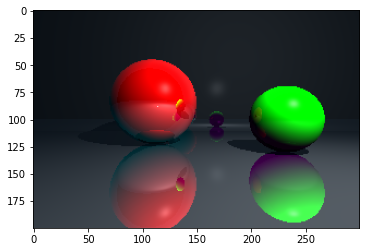

In [5]:

sphere_a = Sphere([-0.5, 0.2, -1],0.5)
sphere_a.set_material([1, 0, 0], [1, 0, 0], [0.3, 0.3, 0.3], 100, 1)
sphere_b = Sphere([0.8, 0, -0.5],0.3)
sphere_b.set_material([0, 1, 0], [0, 1, 0], [0.3, 0.3, 0.3], 100, 0.2)
plane = Plane([0,1,0], [0,-0.3,0])
plane.set_material([0.2, 0.2, 0.2], [0.2, 0.2, 0.2], [1, 1, 1], 1000, 0.5)
background = Plane([0,0,1], [0,0,-3])
background.set_material([0.2, 0.2, 0.2], [0.2, 0.2, 0.2], [0.2, 0.2, 0.2], 1000, 0.5)

objects = [sphere_a,sphere_b,plane,background]
light = PointLight(intensity= np.array([1, 1, 1]),position=np.array([1,1.5,1]),kc=0.1,kl=0.1,kq=0.1)
lights = [light]
ambient = np.array([0.1,0.2,0.3])
camera = np.array([0,0,1])

im = render_scene(camera, ambient, lights, objects, (300, 200), 3)
plt.imshow(im)
plt.imsave('scene4.png', im)

## Scene 5 - Different Lighting
This scene has 3 light sources, each one in different color, and a white background.


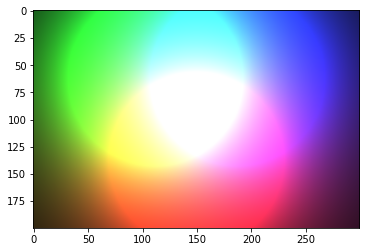

In [6]:
background = Plane([0,0,1], [0,0,-1])
background.set_material([1, 1, 1], [1, 1, 1], [1, 1, 1], 1000, 0.5)


objects = [background]
light_a = SpotLight(intensity= np.array([0, 0, 1]),position=np.array([0.5,0.5,0]), direction=([0,0,1]),
                    kc=0.1,kl=0.1,kq=0.1)
light_b = SpotLight(intensity= np.array([0, 1, 0]),position=np.array([-0.5,0.5,0]), direction=([0,0,1]),
                    kc=0.1,kl=0.1,kq=0.1)
light_c = SpotLight(intensity= np.array([1, 0, 0]),position=np.array([0,-0.5,0]), direction=([0,0,1]),
                    kc=0.1,kl=0.1,kq=0.1)
lights = [light_a,light_b,light_c]
ambient = np.array([0,0,0])
camera = np.array([0,0,1])

im = render_scene(camera, ambient, lights, objects, (300, 200), 3)
plt.imshow(im)
plt.imsave('scene5.png', im)